In [1]:
# Import necessary libraries
import pandas as pd
import kagglehub
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier

# Download the dataset using kagglehub
path = kagglehub.dataset_download("ritwikb3/heart-disease-cleveland")
print("Path to dataset files:", path)

# Load the dataset (assuming it's a CSV file)
cleveland_df = pd.read_csv(f'{path}/Heart_disease_cleveland_new.csv')

# Check the first few rows to understand the structure
cleveland_df.head()


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00


100%|██████████| 3.49k/3.49k [00:00<00:00, 6.55MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ritwikb3/heart-disease-cleveland/versions/1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


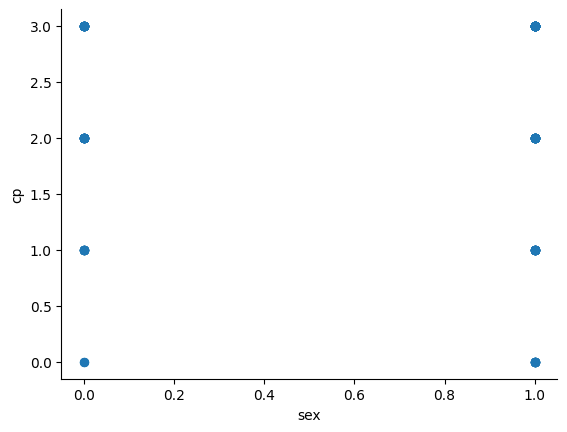

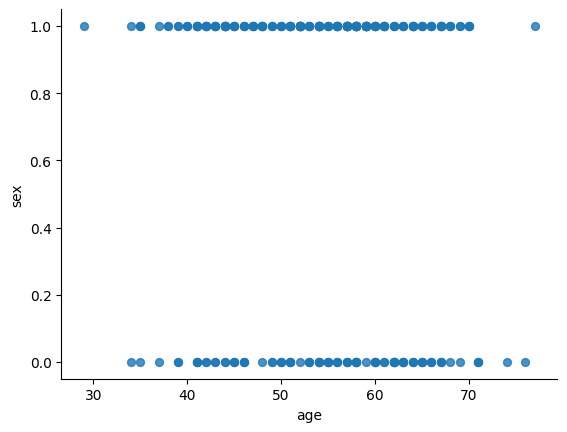

In [2]:
from matplotlib import pyplot as plt

cleveland_df.plot(kind='scatter', x='sex', y='cp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
cleveland_df.plot(kind='scatter', x='age', y='sex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


In [3]:
# Checking for missing values (though the dataset is mentioned to have no missing values)
cleveland_df.isnull().sum()

# Convert categorical columns to numerical using encoding (e.g., sex, cp, etc.)
cleveland_df['sex'] = cleveland_df['sex'].map({1: 'Male', 0: 'Female'})
cleveland_df['cp'] = cleveland_df['cp'].map({0: 'typical angina', 1: 'atypical angina', 2: 'non-anginal pain', 3: 'asymptomatic'})
cleveland_df['fbs'] = cleveland_df['fbs'].map({0: 'False', 1: 'True'})
cleveland_df['restecg'] = cleveland_df['restecg'].map({0: 'Normal', 1: 'ST-T wave abnormality', 2: 'left ventricular hypertrophy'})
cleveland_df['exang'] = cleveland_df['exang'].map({0: 'No', 1: 'Yes'})
cleveland_df['slope'] = cleveland_df['slope'].map({0: 'up', 1: 'flat', 2: 'down'})
cleveland_df['thal'] = cleveland_df['thal'].map({1: 'normal', 2: 'fixed defect', 3: 'reversible defect'})

# Handle categorical columns by encoding them to numbers
cleveland_df = pd.get_dummies(cleveland_df, drop_first=True)

# Replace whitespace in feature names with underscores
cleveland_df.columns = cleveland_df.columns.str.replace(' ', '_')

# Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(cleveland_df.drop('target', axis=1))

# Scaling the features (numerical columns)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cleveland_df[numerical_columns] = scaler.fit_transform(cleveland_df[numerical_columns])

# Separate features and target variable
X_cleveland = cleveland_df.drop('target', axis=1)
y_cleveland = cleveland_df['target']


Logistic Regression on Cleveland Dataset:
Accuracy: 0.8021978021978022
ROC AUC: 0.9035852713178294
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        48
           1       0.76      0.86      0.80        43

    accuracy                           0.80        91
   macro avg       0.81      0.81      0.80        91
weighted avg       0.81      0.80      0.80        91

SVM on Cleveland Dataset:
Accuracy: 0.8461538461538461
ROC AUC: 0.8977713178294574
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        48
           1       0.85      0.81      0.83        43

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.85        91
weighted avg       0.85      0.85      0.85        91

Random Forest on Cleveland Dataset:
Accuracy: 0.8351648351648352
ROC AUC: 0.8975290697674418
              precision    recall  f1-score   support

           0    

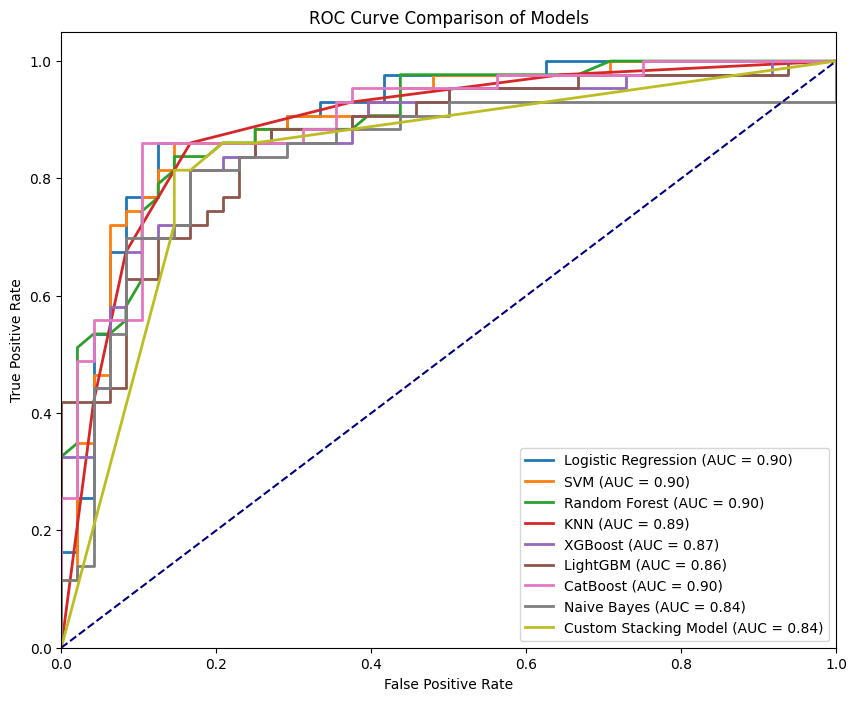

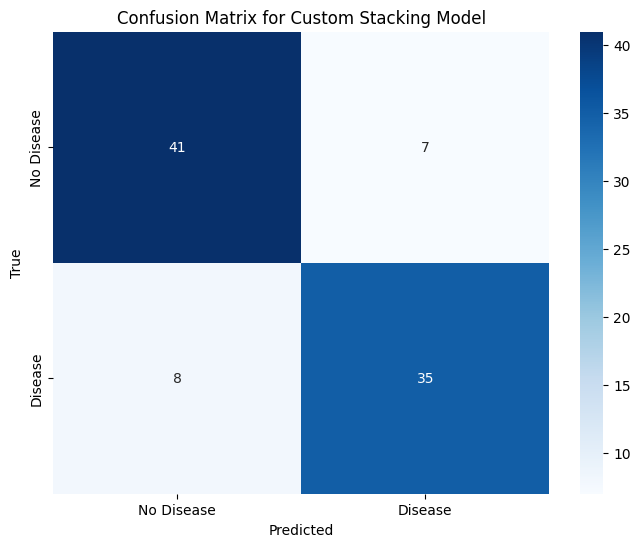

Custom Stacking Model on Cleveland Dataset:
Accuracy: 0.8351648351648352
ROC AUC: 0.8379360465116279
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        48
           1       0.83      0.81      0.82        43

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



In [4]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# Split the dataset into train and test sets
X_train_cleveland, X_test_cleveland, y_train_cleveland, y_test_cleveland = train_test_split(X_cleveland, y_cleveland, test_size=0.3, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(silent=True),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate models on Cleveland dataset
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    model.fit(X_train_cleveland, y_train_cleveland)
    y_pred_cleveland = model.predict(X_test_cleveland)
    y_pred_prob = model.predict_proba(X_test_cleveland)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_cleveland, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    print(f"{model_name} on Cleveland Dataset:")
    print("Accuracy:", accuracy_score(y_test_cleveland, y_pred_cleveland))
    print("ROC AUC:", roc_auc_score(y_test_cleveland, model.predict_proba(X_test_cleveland)[:, 1]))
    print(classification_report(y_test_cleveland, y_pred_cleveland))

# Train base models for stacking
base_models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(silent=True)
}

# Create a new dataset for stacking
base_model_predictions_train = []
base_model_predictions_test = []

for model_name, model in base_models.items():
    model.fit(X_train_cleveland, y_train_cleveland)
    train_pred = model.predict(X_train_cleveland)
    test_pred = model.predict(X_test_cleveland)
    base_model_predictions_train.append(train_pred)
    base_model_predictions_test.append(test_pred)

# Convert predictions to DataFrame
base_model_predictions_train = pd.DataFrame(base_model_predictions_train).T
base_model_predictions_test = pd.DataFrame(base_model_predictions_test).T

# Use Logistic Regression as the final estimator for stacking
final_model = LogisticRegression()
final_model.fit(base_model_predictions_train, y_train_cleveland)

# Make final predictions
y_pred_final = final_model.predict(base_model_predictions_test)

# Calculate ROC curve and AUC for custom stacking model
fpr, tpr, _ = roc_curve(y_test_cleveland, final_model.predict_proba(base_model_predictions_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Now include custom stacking model ROC curve
plt.plot(fpr, tpr, lw=2, label=f'Custom Stacking Model (AUC = {roc_auc:.2f})')

# Add the diagonal line and finalize the plot
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Models')
plt.legend(loc='lower right')
plt.show()

# Visualizing the confusion matrix for the custom stacking model
conf_matrix = confusion_matrix(y_test_cleveland, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for Custom Stacking Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate and print metrics for the custom stacking model
print("Custom Stacking Model on Cleveland Dataset:")
print("Accuracy:", accuracy_score(y_test_cleveland, y_pred_final))
print("ROC AUC:", roc_auc_score(y_test_cleveland, final_model.predict_proba(base_model_predictions_test)[:, 1]))
print(classification_report(y_test_cleveland, y_pred_final))


Skipping XGBoost due to error: 'super' object has no attribute '__sklearn_tags__'
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 7, number of negative: 9
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 16, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437500 -> initscore=-0.251314
[LightGBM] [Info] Start training from score -0.251314
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves 

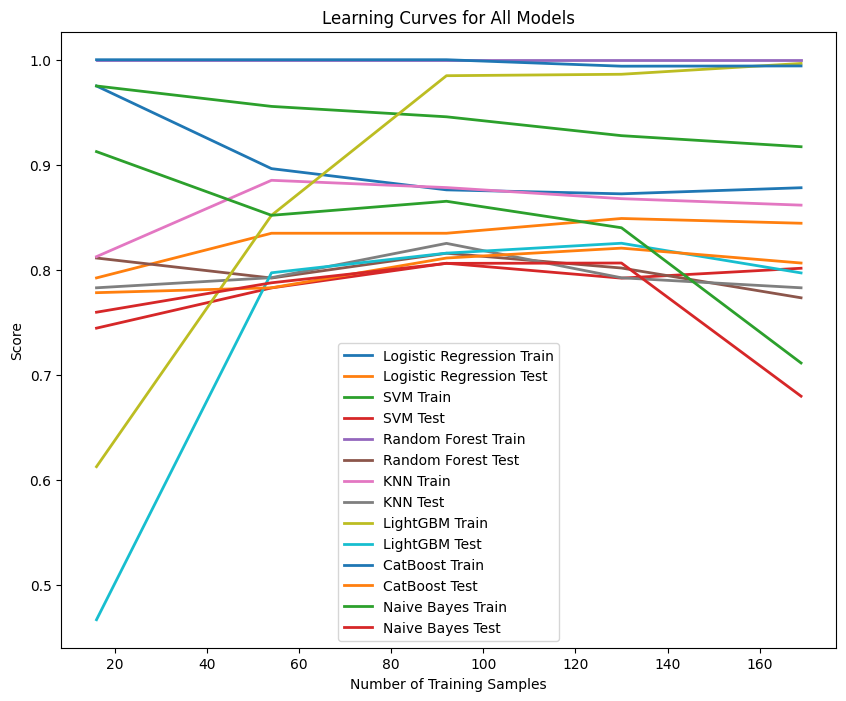

[LightGBM] [Info] Number of positive: 96, number of negative: 116
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 212, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.452830 -> initscore=-0.189242
[LightGBM] [Info] Start training from score -0.189242
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


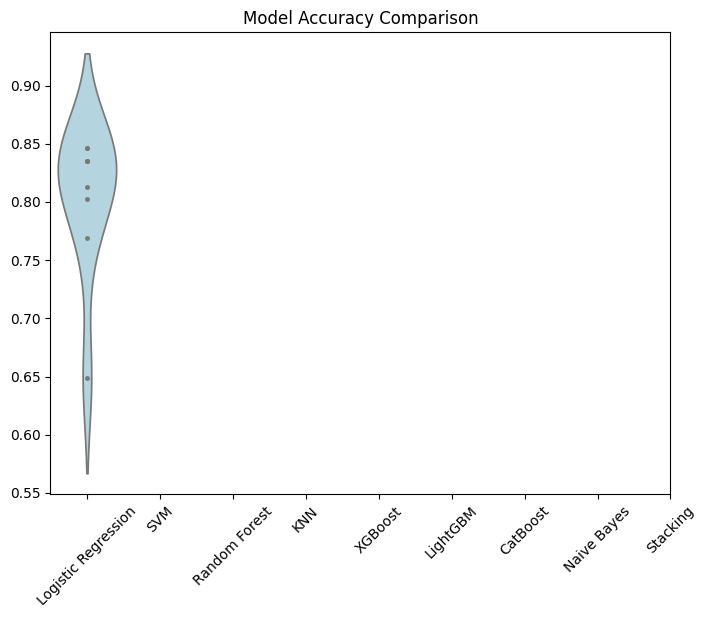

In [5]:
# Learning curve plot
from sklearn.model_selection import learning_curve

plt.figure(figsize=(10, 8))

# Loop through all models to plot their learning curves
for model_name, model in models.items():
    try:
        # Only plot learning curves for models that work with sklearn's learning_curve
        train_sizes, train_scores, test_scores = learning_curve(model, X_train_cleveland, y_train_cleveland, cv=5, n_jobs=1)  # Avoid parallelism for simplicity

        # Plotting the learning curve
        plt.plot(train_sizes, train_scores.mean(axis=1), label=f'{model_name} Train', lw=2)
        plt.plot(train_sizes, test_scores.mean(axis=1), label=f'{model_name} Test', lw=2)

    except Exception as e:
        print(f"Skipping {model_name} due to error: {e}")

plt.title('Learning Curves for All Models')
plt.xlabel('Number of Training Samples')
plt.ylabel('Score')
plt.legend()
plt.show()

# Violin plot for model comparison (Accuracy score)
accuracy_scores = []

for model_name, model in models.items():
    model.fit(X_train_cleveland, y_train_cleveland)
    accuracy = accuracy_score(y_test_cleveland, model.predict(X_test_cleveland))
    accuracy_scores.append(accuracy)

# Add stacking model accuracy
stacking_accuracy = accuracy_score(y_test_cleveland, y_pred_final)  # This is the accuracy of the custom stacking model
accuracy_scores.append(stacking_accuracy)

# Plotting the violin plot for accuracy comparison
plt.figure(figsize=(8, 6))
sns.violinplot(data=accuracy_scores, inner="point", color="lightblue")
plt.xticks(range(len(models) + 1), list(models.keys()) + ['Stacking'], rotation=45)  # Include 'Stacking' in the x-axis labels
plt.title('Model Accuracy Comparison')
plt.show()
